# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [4]:
! wget https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?format=csv -O World_firearms_murders_and_ownership.csv
! mv World_firearms_murders_and_ownership.csv $PUIDATA

--2018-11-14 23:17:36--  https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.7.142, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.7.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘World_firearms_murders_and_ownership.csv’

World_firearms_murd     [ <=>                ]   7.67K  --.-KB/s    in 0s      

2018-11-14 23:17:37 (95.1 MB/s) - ‘World_firearms_murders_and_ownership.csv’ saved [7852]



In [5]:
! wget https://raw.githubusercontent.com/Sherryairui/file_transfer/master/data-pvLFI.csv
! mv data-pvLFI.csv $PUIDATA

--2018-11-14 23:17:39--  https://raw.githubusercontent.com/Sherryairui/file_transfer/master/data-pvLFI.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449 [text/plain]
Saving to: ‘data-pvLFI.csv’

data-pvLFI.csv      100%[===================>]     449  --.-KB/s    in 0s      

2018-11-14 23:17:39 (90.9 MB/s) - ‘data-pvLFI.csv’ saved [449/449]



In [6]:
! wget https://raw.githubusercontent.com/Sherryairui/file_transfer/master/world_population.csv
! mv world_population.csv $PUIDATA

--2018-11-14 23:17:43--  https://raw.githubusercontent.com/Sherryairui/file_transfer/master/world_population.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172135 (168K) [text/plain]
Saving to: ‘world_population.csv’

world_population.cs 100%[===================>] 168.10K  --.-KB/s    in 0.006s  

2018-11-14 23:17:43 (27.9 MB/s) - ‘world_population.csv’ saved [172135/172135]



In [7]:
! wget http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv -O world_gdp.zip
! mv world_gdp.zip $PUIDATA
! unzip $PUIDATA/world_gdp.zip -d $PUIDATA/world_gdp_yd1402

--2018-11-14 23:17:45--  http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.36
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116092 (113K) [application/zip]
Saving to: ‘world_gdp.zip’

world_gdp.zip       100%[===================>] 113.37K  --.-KB/s    in 0.03s   

2018-11-14 23:17:45 (3.29 MB/s) - ‘world_gdp.zip’ saved [116092/116092]

Archive:  /nfshome/yd1402/PUIdata/world_gdp.zip
  inflating: /nfshome/yd1402/PUIdata/world_gdp_yd1402/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/yd1402/PUIdata/world_gdp_yd1402/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/yd1402/PUIdata/world_gdp_yd1402/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  


In [7]:
World_firearms_murders_and_ownership = pd.read_csv(os.getenv("PUIDATA") + '/World_firearms_murders_and_ownership.csv')
World_firearms_murders_and_ownership.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [8]:
World_firearms_murders_and_ownership.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [9]:
World_firearms_murders_and_ownership.drop(['ISO code', 'Source','% of homicides by firearm',  
                                           'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership', 
                                           'Average firearms per 100 people'], axis = 1, inplace = True)

In [10]:
World_firearms_murders_and_ownership.rename(columns={ World_firearms_murders_and_ownership.columns[0]: "Country Name"}, inplace=True)
World_firearms_murders_and_ownership.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [11]:
pvLFI = pd.read_csv(os.getenv("PUIDATA") + "/data-pvLFI.csv")
pvLFI.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [12]:
pvLFI.rename(columns={ pvLFI.columns[1]: "Guns/100 inhabitants", pvLFI.columns[2]: "Number of mass shootings" }, inplace=True)
pvLFI.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [13]:
world_population = pd.read_csv(os.getenv("PUIDATA") + '/world_population.csv', skiprows = 4)
world_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [14]:
world_population = world_population[["Country Name", "2012"]]
world_population.rename(columns={ world_population.columns[1]: "pop"}, inplace=True)
world_population.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [15]:
world_gdp = pd.read_csv(os.getenv("PUIDATA") + '/world_gdp_xc1454/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows = 4)
world_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [16]:
world_gdp = world_gdp[["Country Name", "2012"]]
world_gdp.rename(columns={ world_gdp.columns[1]: "gdp"}, inplace=True)
world_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [17]:
df_ = World_firearms_murders_and_ownership.merge(world_population)
df_ =  df_.merge(world_gdp)

In [18]:
df_ = df_.merge(pvLFI, left_on='Country Name', right_on='Country').dropna()

In [19]:
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,Australia,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,Austria,30.4,1
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,Belgium,17.2,2
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,Canada,30.8,4
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,Denmark,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


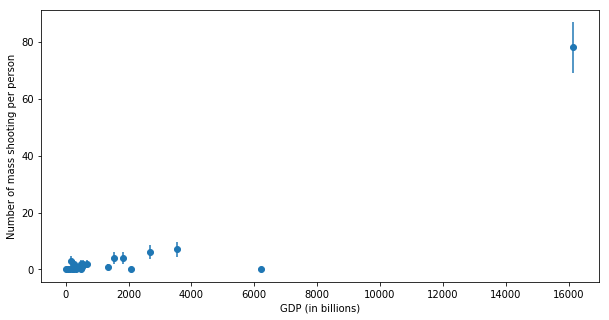

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


# Figure 1

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings

In [21]:
df_['gdp_per_pop'] = df_.gdp/df_['pop'].astype(float)

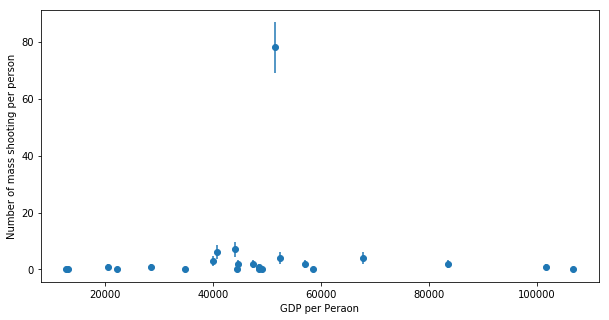

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [22]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


scatter = ax.scatter(df_.gdp_per_pop, df_['Number of mass shootings'])
ax.errorbar(df_.gdp_per_pop, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per Peraon")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


# Figure 2

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [23]:
df_['shootingspp'] = df_["Average total all civilian firearms"] / df_['pop'] * 1e3

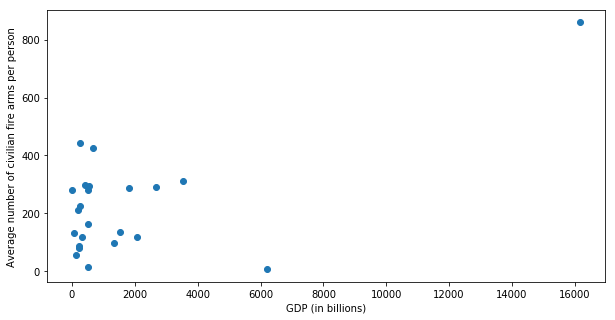

In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()


# Figure 3

Average number of civilian fire arms per person vs GDP. The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings

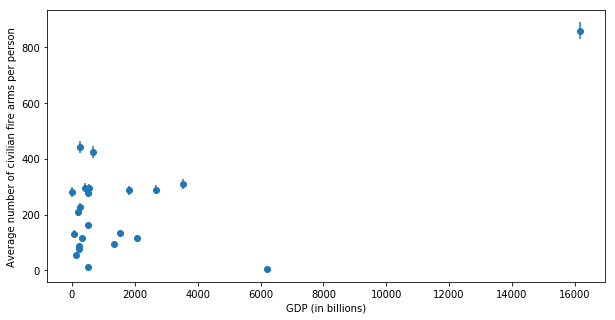

In [25]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp/ 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()


# Figure 4

Average number of civilian fire arms per person vs GDP, errors represent Poisson statistics. The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

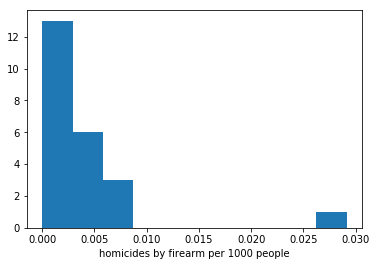

In [26]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

# Figure 5

Here is the histogram about homicides by firearm per 1000 people

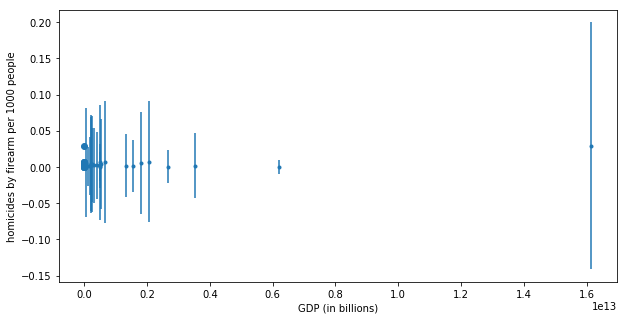

In [27]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_.gdp, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("homicides by firearm per 1000 people")
ax.set_ylim()
pl.show()


# Figure 5

Homicides by firearm per 1000 people vs GDP, errors represent Poisson statistics. The plot in the range 0.6~0.8 is different from other plots. But I do not think it is a outlier. The plot in the right maybe the outlier.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [28]:
df_

,Country Name,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp_per_pop,shootingspp
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,134.110294
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,296.560222
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,161.750558
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,286.326445
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,116.246379
5,Finland,24.0,2400000.0,5413971.0,2.567065e+11,Finland,45.3,2,47415.559871,443.297535
6,France,35.0,19000000.0,65659789.0,2.683825e+12,France,31.2,6,40874.715956,289.370409
7,Germany,158.0,25000000.0,80425823.0,3.543984e+12,Germany,30.3,7,44065.248908,310.845436
8,Greece,29.0,2500000.0,11045011.0,2.456707e+11,Greece,22.5,0,22242.681935,226.346538
9,Hungary,7.0,560000.0,9920362.0,1.278566e+11,Hungary,5.5,0,12888.304591,56.449553


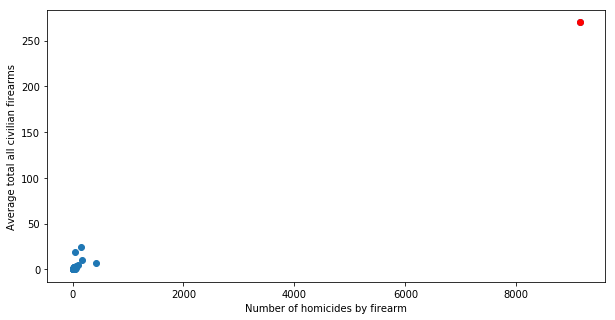

In [29]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/1e6)
plot(df_['Number of homicides by firearm'][22], df_['Average total all civilian firearms'][22]/1e6, 'ro')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()


# Figure 6

Number of homicides by firearm vs Average total all civilian firearms. With USA in red

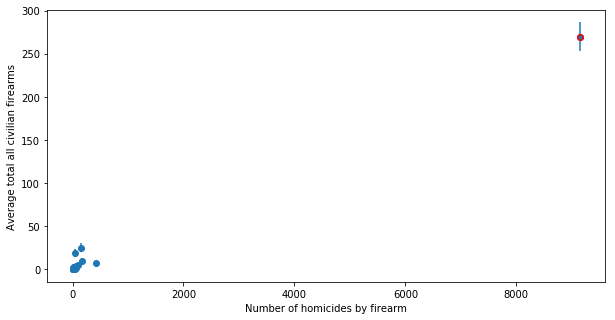

In [30]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/1e6)
plot(df_['Number of homicides by firearm'][22], df_['Average total all civilian firearms'][22]/1e6, 'ro')
ax.errorbar(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/1e6, 
            yerr = np.sqrt(df_['Average total all civilian firearms']/1e6 * 1.0), fmt = '.')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()


# Figure 7

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics. With USA in red

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


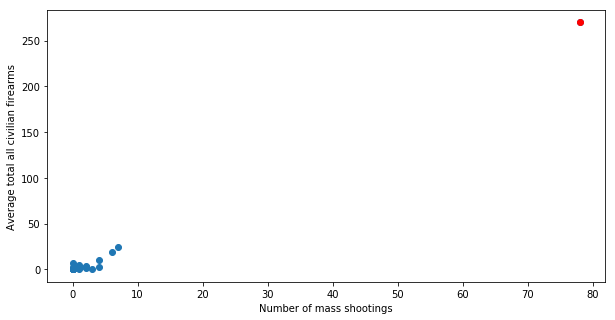

In [31]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms']/1e6)
plot(df_['Number of mass shootings'][22], df_['Average total all civilian firearms'][22]/1e6, 'ro')
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()


# Figure 7

Number of mass shootings vs Average total all civilian firearms. With USA in red

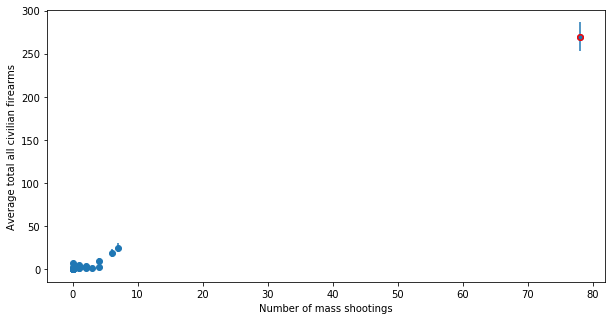

In [32]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms']/1e6)
plot(df_['Number of mass shootings'][22], df_['Average total all civilian firearms'][22]/1e6, 'ro')
ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms']/1e6, 
            yerr = np.sqrt(df_['Average total all civilian firearms']/1e6 * 1.0), fmt = '.')
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()

# Figure 8

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics. With USA in red

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [33]:
df_['masspp'] = df_["Number of mass shootings"] / df_['pop']
df_['civilianpp'] = df_['Average total all civilian firearms']/df_['pop']

In [34]:
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp_per_pop,shootingspp,masspp,civilianpp
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,134.110294,1.758824e-07,0.134110
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,296.560222,1.186241e-07,0.296560
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,161.750558,1.797228e-07,0.161751
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,286.326445,1.151061e-07,0.286326
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,116.246379,0.000000e+00,0.116246


In [35]:
df_['masspp'] = df_['masspp'] * 1e7
#df_['civilianpp'] = df_['civilianpp'] *1e1
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp_per_pop,shootingspp,masspp,civilianpp
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,134.110294,1.758824,0.134110
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,296.560222,1.186241,0.296560
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,161.750558,1.797228,0.161751
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,286.326445,1.151061,0.286326
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,116.246379,0.000000,0.116246


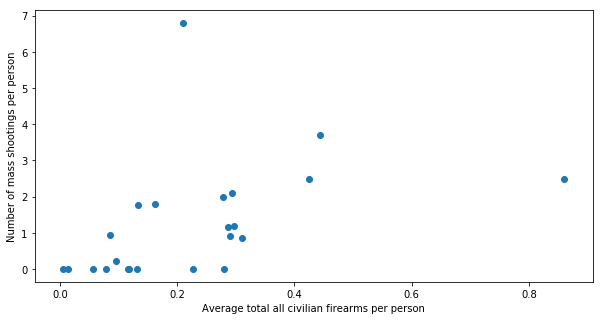

In [36]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['civilianpp'], df_['masspp'])
ax.set_ylabel("Number of mass shootings per person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylim()
pl.show()


# Figure 9

Number of mass shootings per person vs Average total all civilian firearms per person.

In [37]:
masspp = df_['masspp']
civilianpp =sm.add_constant(df_['civilianpp'])

In [38]:
ols_fit=sm.OLS(masspp, civilianpp).fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        02:26:55   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3684      0.497      0.742      0.467        -0.665     1.402
civilianpp     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

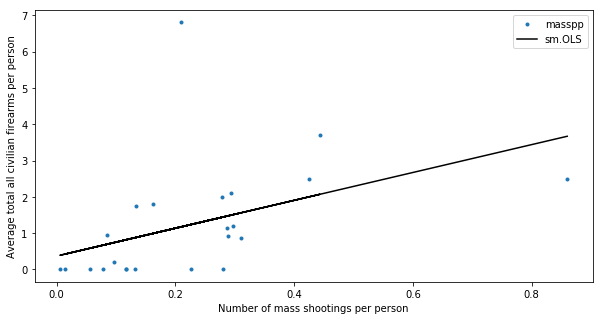

In [39]:
fig = pl.figure(figsize=(10,5)) 


pl.plot(df_['civilianpp'], masspp, '.')
pl.plot(df_['civilianpp'], ols_fit.fittedvalues, 'k-', label="sm.OLS")
pl.xlabel("Number of mass shootings per person")
pl.ylabel("Average total all civilian firearms per person")
pl.legend()

# Figure 10

Number of mass shootings per person vs Average total all civilian firearms per person.The black line is the OLS fit line.

In [40]:
wls_fit = sm.WLS(masspp, civilianpp, weights=1/np.sqrt(df_['civilianpp'])).fit()
wls_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.281
Model:                            WLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.220
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00923
Time:                        02:26:56   Log-Likelihood:                -38.631
No. Observations:                  23   AIC:                             81.26
Df Residuals:                      21   BIC:                             83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0763      0.354      0.216      0.831        -0.659     0.812
civilianpp     4.9500      1.727      2.867      0.009         1.359     8.541
==============================================================================
Omnibus:                       35.826   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.403
Skew:                           2.738   Prob(JB):                     4.29e-22
Kurtosis:                      11.526   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

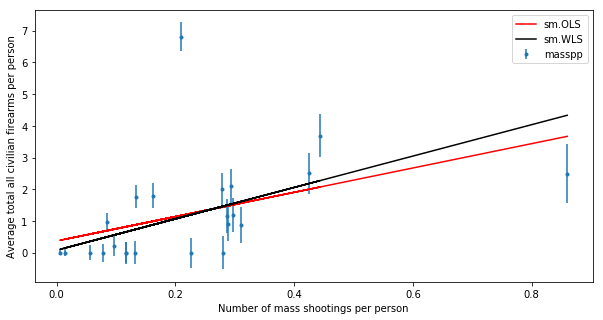

In [41]:
fig = pl.figure(figsize=(10,5))

pl.errorbar(df_['civilianpp'], masspp, yerr=np.sqrt(df_['civilianpp']), fmt='.')
pl.plot(df_['civilianpp'], ols_fit.fittedvalues, 'r-', label="sm.OLS")
pl.plot(df_['civilianpp'], wls_fit.fittedvalues, 'k-', label="sm.WLS")
pl.xlabel("Number of mass shootings per person")
pl.ylabel("Average total all civilian firearms per person")
pl.legend()

# Figure 11

Number of mass shootings per person vs Average total all civilian firearms per person.The red line is the OLS fit line. The black line is the WLS fit line

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [42]:
indexAnd = ( (df_['masspp'] < 6) & (df_['civilianpp']  < 0.6) ) #this will contain True where at least one of the 2 conditions are satisfied.

df_new = df_[indexAnd]

In [43]:
masspp_new = df_new['masspp']
civilianpp_new = sm.add_constant(df_new['civilianpp'])

In [44]:
ols_fit_new=sm.OLS(masspp_new, civilianpp_new).fit()
ols_fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     21.02
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000202
Time:                        02:26:56   Log-Likelihood:                -22.679
No. Observations:                  21   AIC:                             49.36
Df Residuals:                      19   BIC:                             51.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2731      0.306     -0.894      0.383        -0.913     0.367
civilianpp     6.0230      1.314      4.585      0.000         3.274     8.772
==============================================================================
Omnibus:                        0.185   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.379
Skew:                           0.141   Prob(JB):                        0.828
Kurtosis:                       2.405   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
wls_fit_new = sm.WLS(masspp_new, civilianpp_new, weights=1/np.sqrt(df_new['civilianpp'])).fit()
wls_fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.556
Model:                            WLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     23.76
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000105
Time:                        02:26:56   Log-Likelihood:                -20.486
No. Observations:                  21   AIC:                             44.97
Df Residuals:                      19   BIC:                             47.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1307      0.194     -0.674      0.509        -0.537     0.275
civilianpp     5.3794      1.104      4.874      0.000         3.070     7.689
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.901
Skew:                           0.308   Prob(JB):                        0.637
Kurtosis:                       2.195   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

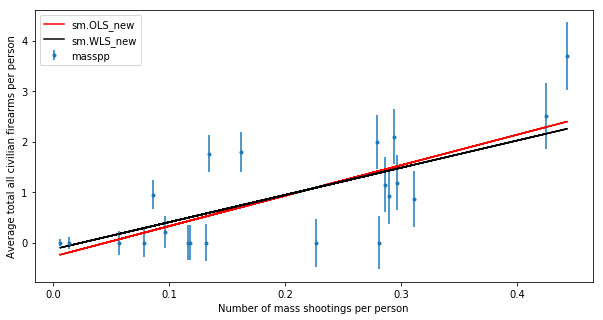

In [46]:
fig = pl.figure(figsize=(10,5))

pl.errorbar(df_new['civilianpp'], masspp_new, yerr=np.sqrt(df_new['civilianpp']), fmt='.')
pl.plot(df_new['civilianpp'], ols_fit_new.fittedvalues, 'r-', label="sm.OLS_new")
pl.plot(df_new['civilianpp'], wls_fit_new.fittedvalues, 'k-', label="sm.WLS_new")
pl.xlabel("Number of mass shootings per person")
pl.ylabel("Average total all civilian firearms per person")
pl.legend();

# Figure 12

Number of mass shootings per person vs Average total all civilian firearms per person.The red line is the OLS fit line. The black line is the WLS fit line. Remove the outerliers